In [1]:
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import stats
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DataSet/HousingRegressionTrain.csv')

## Inspecting Data


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are 38 numerical features and 43 categorical features. 

Lets see a summary of the numerical features below

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# After refering to the data_description we are getting all the categorical and numerical features together

categorical_features = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
                       'Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
                       'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical',
                       'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature',
                       'SaleType','SaleCondition']
numerical_features = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                      'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt',
                      'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']

In [7]:
df[categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          91 non-null     object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  RoofStyle      1460 non-null   object
 17  RoofMatl       1460 non-null   object
 18  Exterior1st    1460 non-null

In [8]:
df[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   YearBuilt      1460 non-null   int64  
 3   YearRemodAdd   1460 non-null   int64  
 4   MasVnrArea     1452 non-null   float64
 5   BsmtFinSF1     1460 non-null   int64  
 6   BsmtFinSF2     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  LowQualFinSF   1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  BsmtFullBath   1460 non-null   int64  
 14  BsmtHalfBath   1460 non-null   int64  
 15  FullBath       1460 non-null   int64  
 16  HalfBath       1460 non-null   int64  
 17  BedroomAbvGr   1460 non-null   int64  
 18  KitchenA

It is evident that some columns that are actually categorical in nature have numeric values and have to be converted so by converting the type to string

In [9]:
change_coltype = list(df[categorical_features].select_dtypes(exclude='object').columns)
df[change_coltype] = df[change_coltype].astype('object')

## Checking the correlation matrix for numerical features

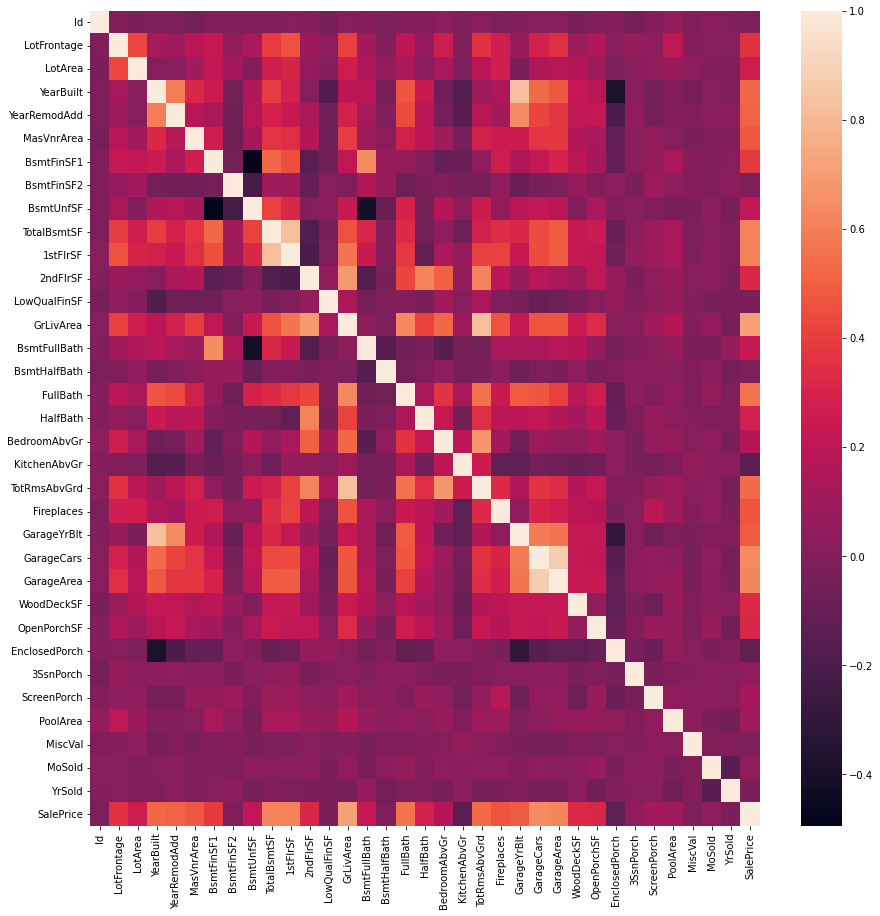

In [10]:
plt.figure(figsize=[15,15])
sns.heatmap(df.corr())
plt.show()

In [11]:
## Checking which are the top 10 co-related factors
un_stacked = df.corr().abs().unstack().sort_values(kind='quicksort',ascending=False).drop_duplicates(keep='first', inplace=False)
un_stacked[un_stacked < 1.00].head(10)

GarageCars    GarageArea      0.882475
YearBuilt     GarageYrBlt     0.825667
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
GrLivArea     SalePrice       0.708624
2ndFlrSF      GrLivArea       0.687501
TotRmsAbvGrd  BedroomAbvGr    0.676620
BsmtFinSF1    BsmtFullBath    0.649212
YearRemodAdd  GarageYrBlt     0.642277
GarageCars    SalePrice       0.640409
dtype: float64

As evident from the graph above and the values from the corelation matrix . There are columns which are highly co-related to each other. We could drop those

## Visualizing and exploring the categorical features

In [12]:
## Checking for missing values
round(df[categorical_features].isnull().mean()*100,2)

MSSubClass        0.00
MSZoning          0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinType2      2.60
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
KitchenQual       0.00
Functional        0.00
FireplaceQu      47.26
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
PavedDrive        0.00
PoolQC           99.52
Fence            80.75
MiscFeature

In [13]:
df[categorical_features] = df[categorical_features].replace(np.nan,'FeatureAbsent')

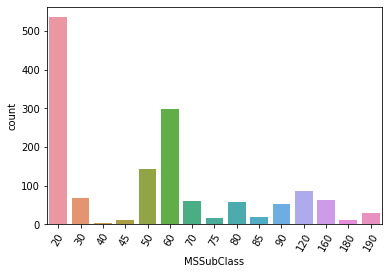

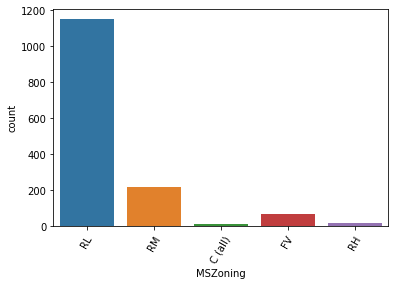

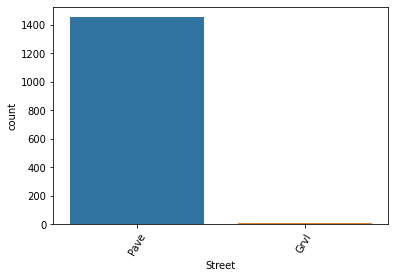

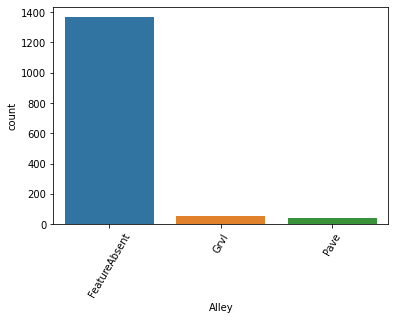

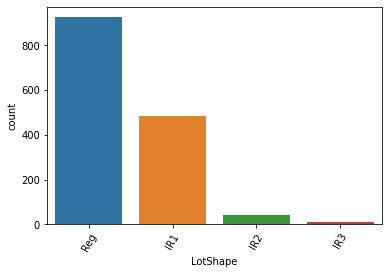

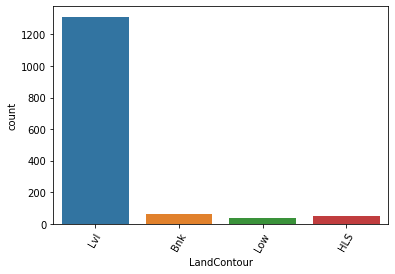

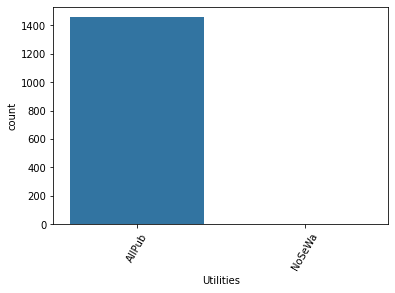

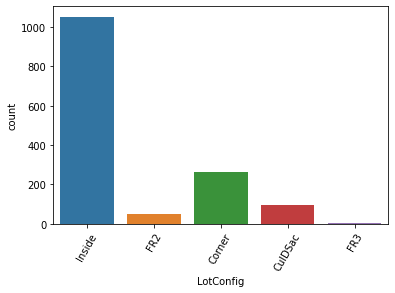

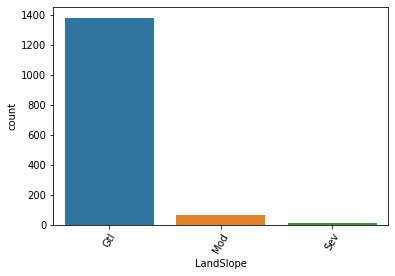

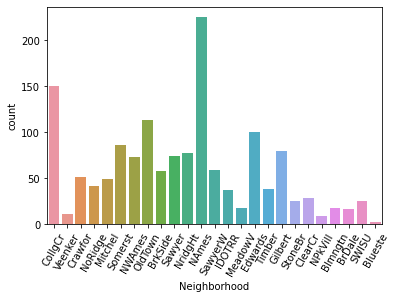

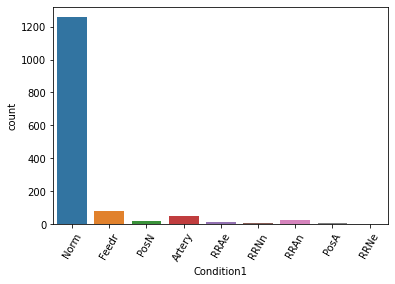

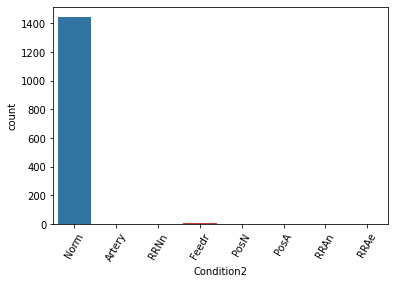

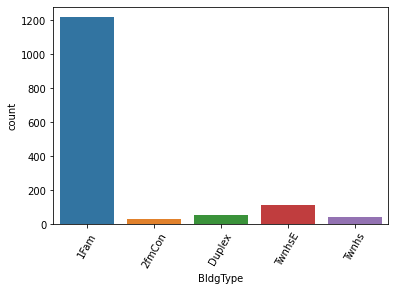

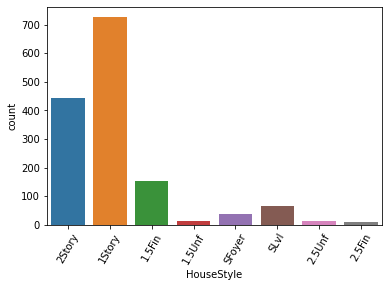

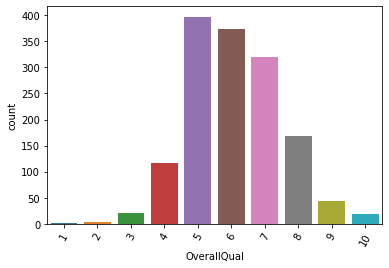

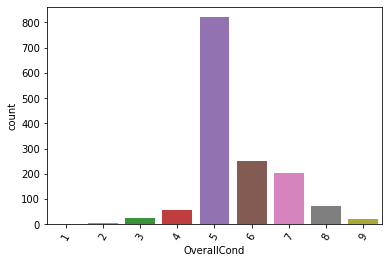

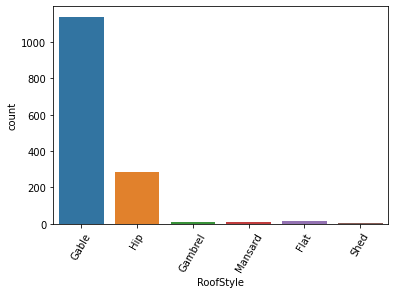

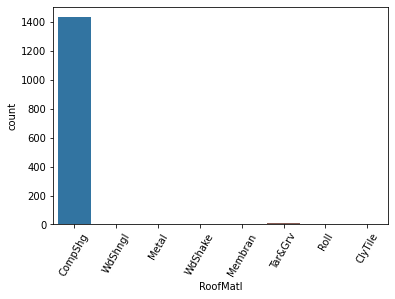

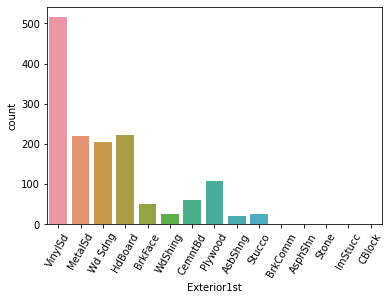

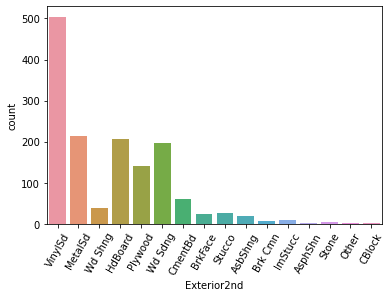

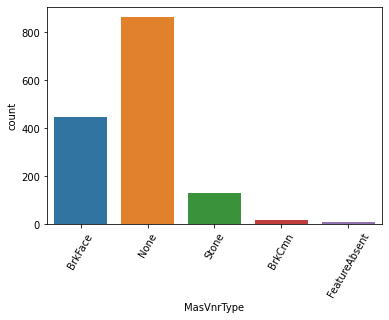

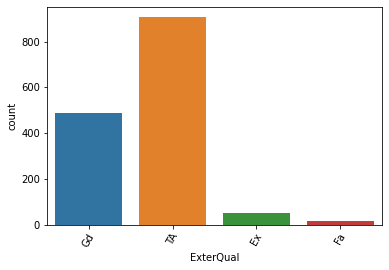

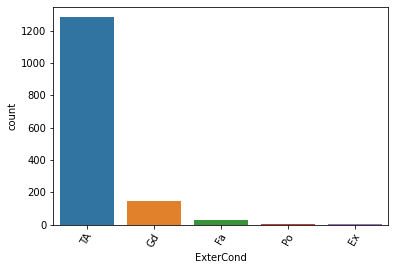

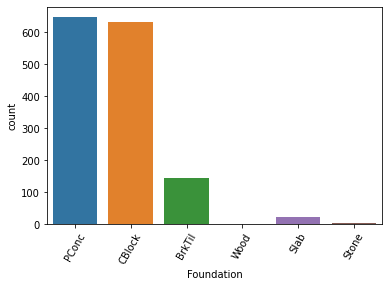

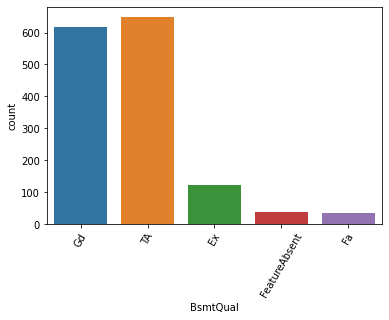

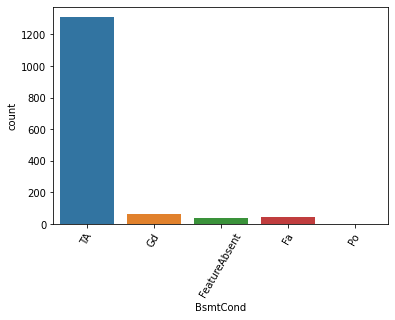

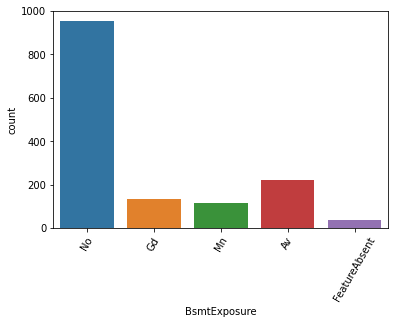

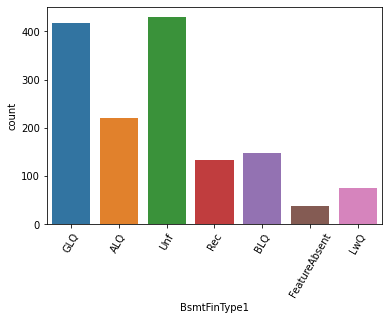

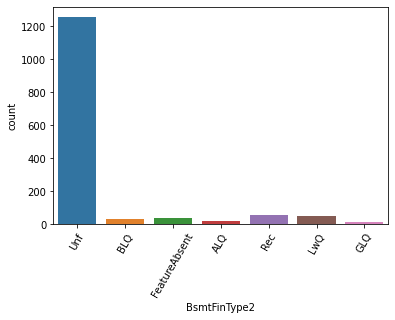

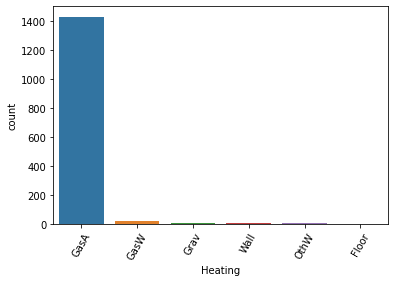

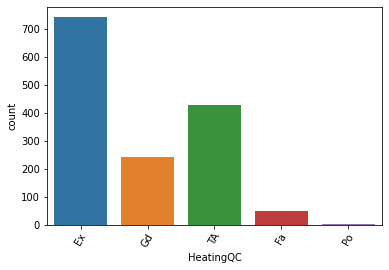

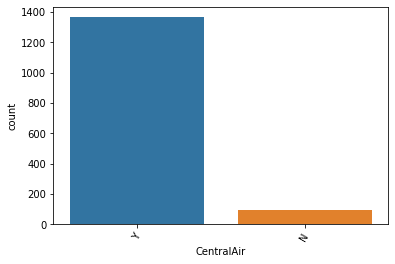

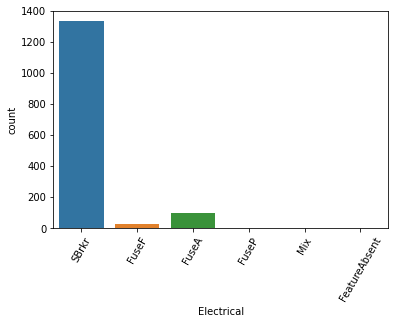

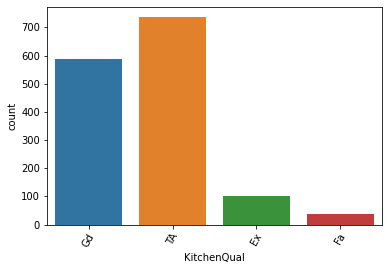

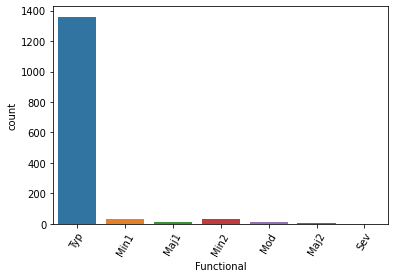

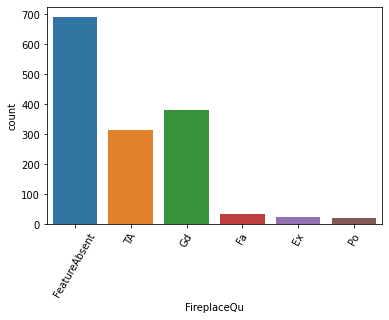

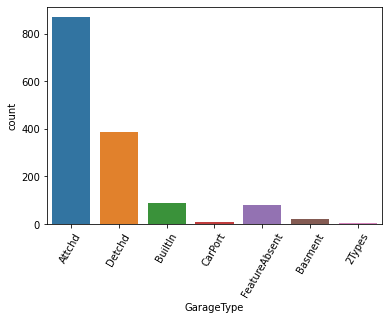

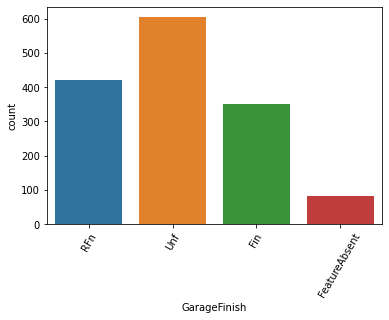

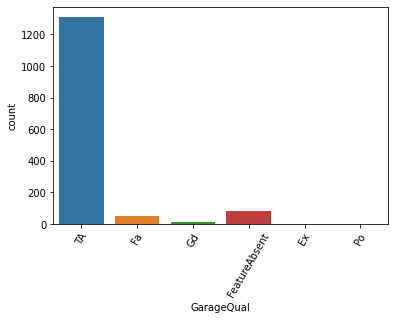

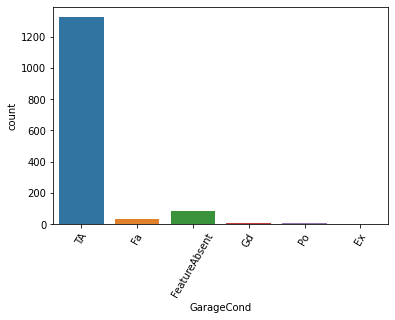

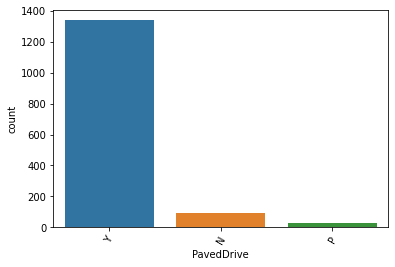

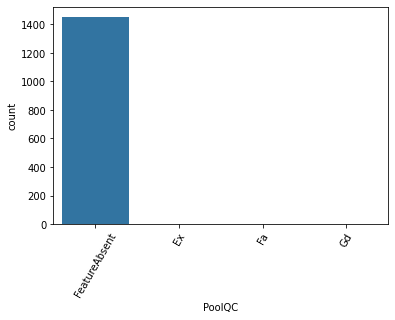

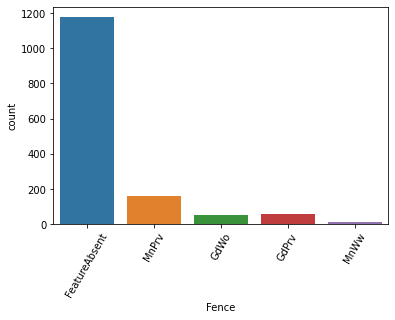

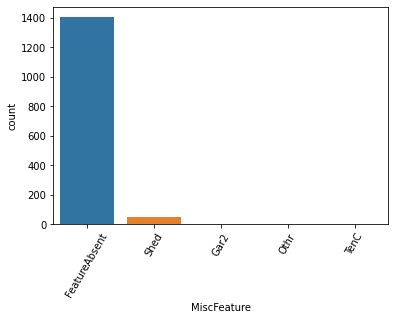

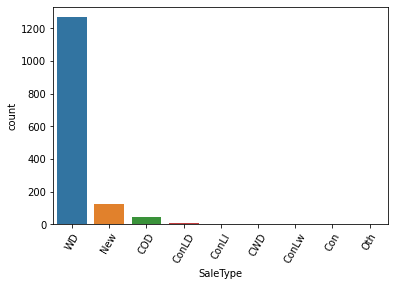

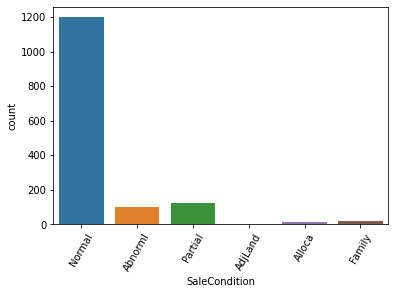

In [14]:
for col in categorical_features:
  sns.countplot(df[col])
  plt.xlabel(col)
  plt.xticks(rotation =60)
  plt.show()

- MSSubClass - 20(1-STORY 1946 & NEWER ALL STYLES) is the largerst occupancy and 60(is the second largest) count in the dataset
- MSZoning -  Most Houses sold are in Residential Low Density creating bias towards such data
- Street - Most values is Pave making the column irrelevant for any further anlysis. We will drop it
- LotShape - Regular and Slighly Irregular occupy most of the data
- LandContour - Almost all of the values are Lvl making this field skewed towards the values
- Utilities - All the houses have all public utitlies hence we can drop the columns
- LotConfig - Most lots are inside lot which make sense since not all houses can be corner house or similar
- LandSlope - This indicates most of lands have gentle sope we can check the significance of the variable while model building
- Neighborhood- Neighbourhood is highly diverse which might give us good informatin while predicting the sale price
- Condition1 - Mosthouses are normal and very few any diversity in conditions making data highy skewed
- Condition2 - Almost all the houses do not have seconds condition since Conition1 has very low count on values other than normal
- BldgType - Most houses are Single-family Detached, However this might give us more information despite being skweed so we wont be dropping it
- HouseStyle - Most houses are 1story,2Story
- RoofStyle -  Most houses have either gable or hip roof
- RoofMatl - Roof Matrial is extremely biased towards CompShg which makes it unsuitable to detect variance in data
- ExterCond - Most of the houses have Average exterior
- BsmtCond - Most of the houses have Average Bsmnt Cond
- BsmtExposure - Most of the basesment have no exposure but there are values which are significant in other cases
- BsmtFinType2 - Is biased towards Unf(Unfinihed)
- Heating - Is mostly GasA other values are non significant
- CentralAir - Yes or No Most of houses are Central Air Conditioned
- Electrical - SBrkr is the most common in Electrical
- Functional - which describe functionality of the house Typical/Average is the most common
- GarageQual - Typical and average is the most common
- GarageCond - Typical and average is the most common
- PavedDrive - Most drives are Paved
- MiscFeature - Most houses have shed
- SaleType -  Most houses are sold undes conventional sales deed type
- SaleCondition - Most sales are normal however we can see what else affects the sale price

Exterior1st, Exterior2nd, MasVnrType, ExterQual, Foundation, OverallQual, OverallCond, BsmtQual, BsmtFinType1, HeatingQC, KitchenQual, FireplaceQu, GarageType, GarageFinish,PoolQC,Fence - have a normal dstribution





## Checking plots of numerical variable against sales price



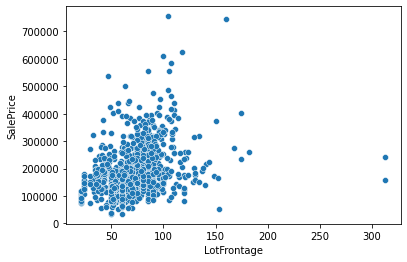

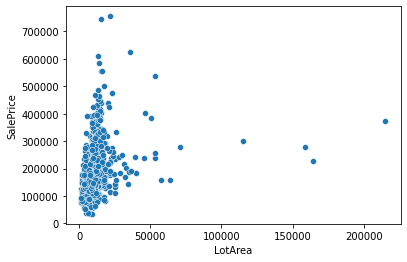

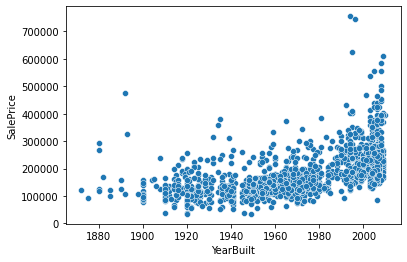

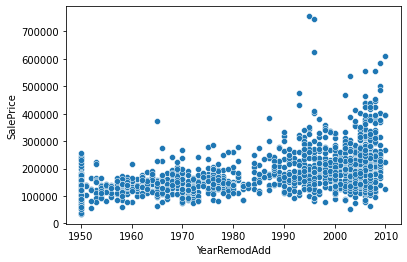

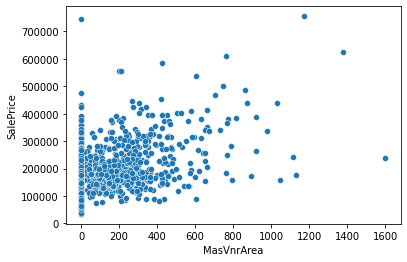

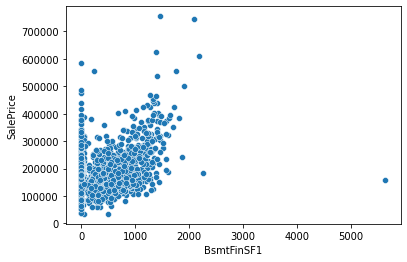

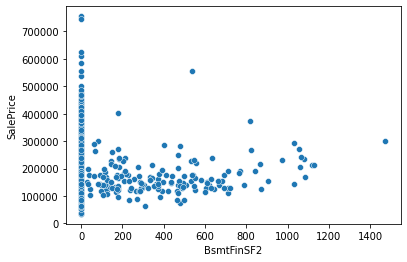

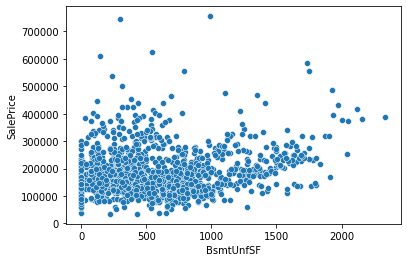

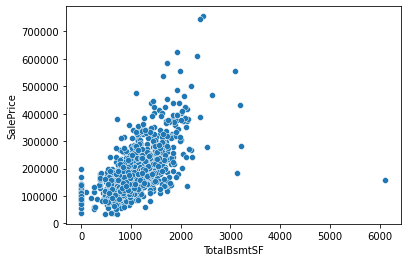

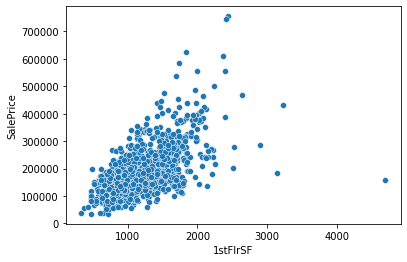

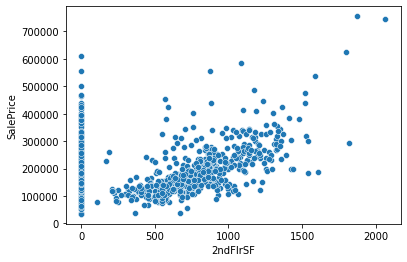

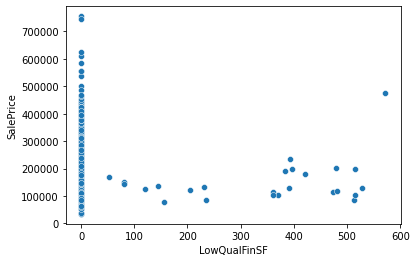

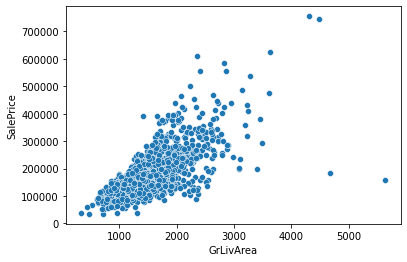

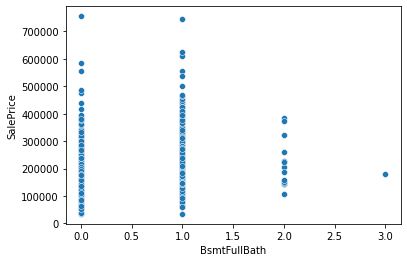

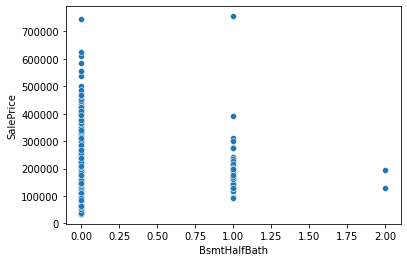

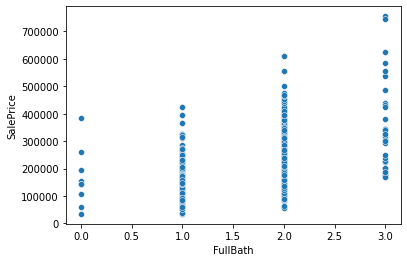

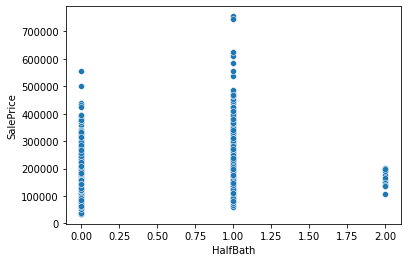

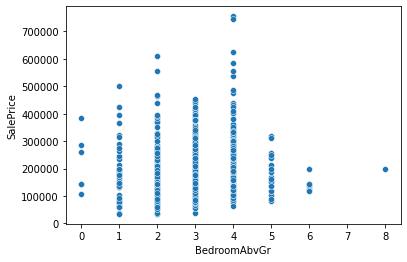

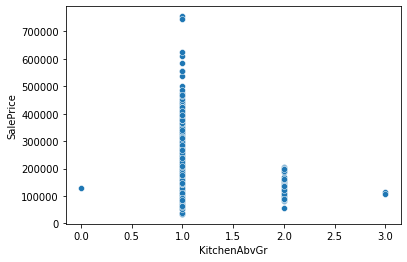

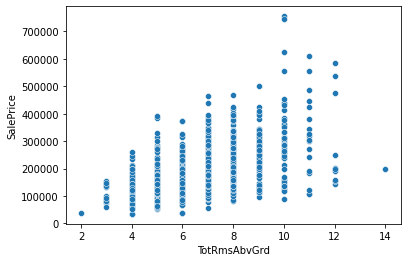

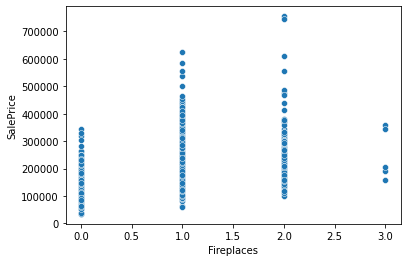

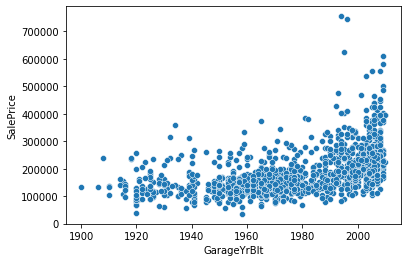

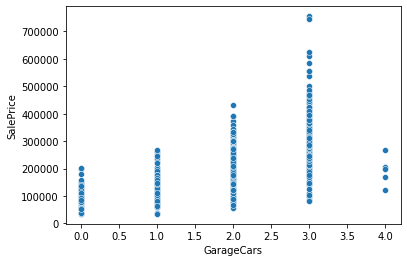

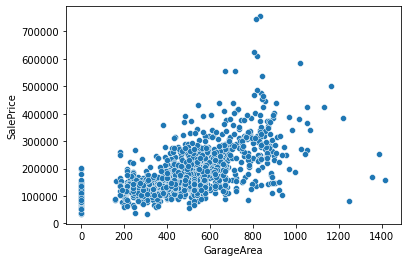

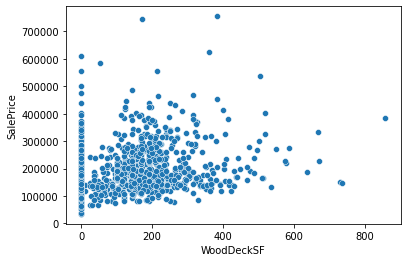

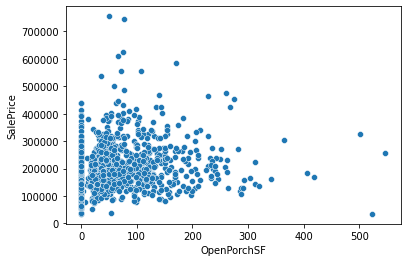

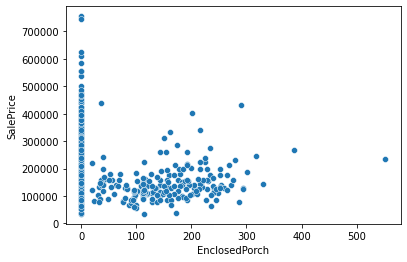

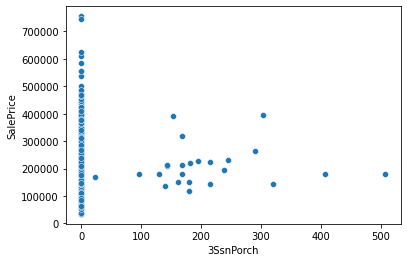

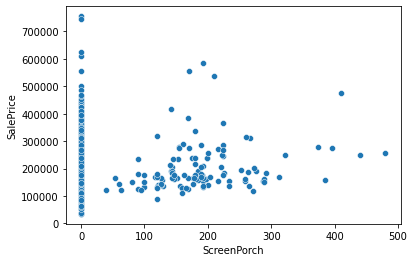

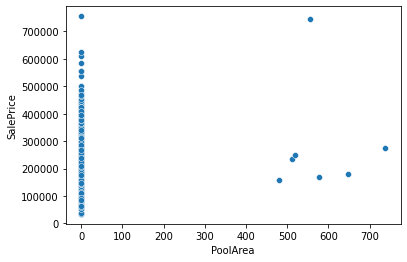

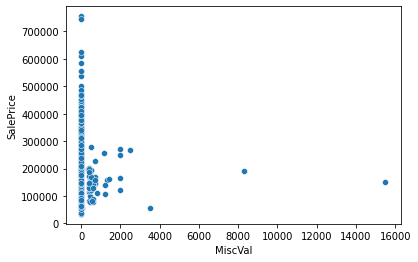

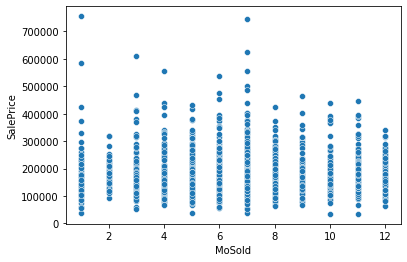

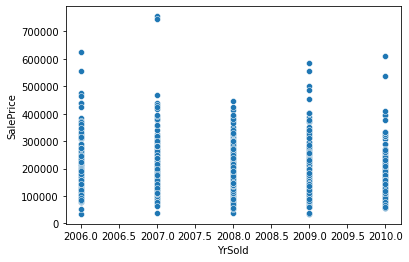

In [15]:
for col in numerical_features:
  if col == 'SalePrice':
    continue
  sns.scatterplot(df[col],df['SalePrice'])
  plt.xlabel(col)
  plt.show()

It is evident from the scatter plot some features are linearly related to the saleprice and other might be dependent on features in co-relation to explain price plot

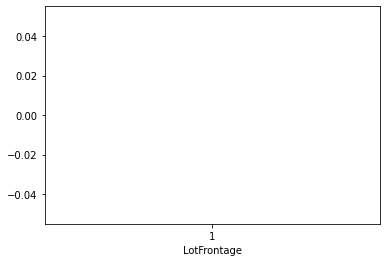

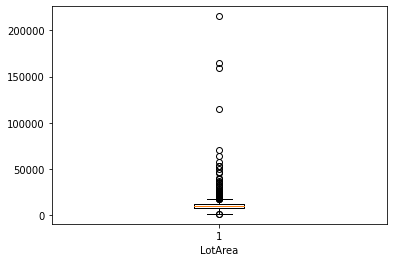

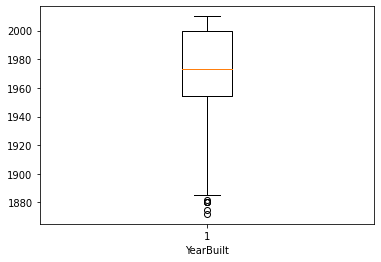

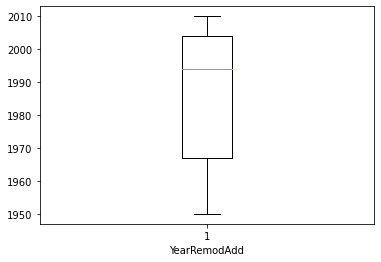

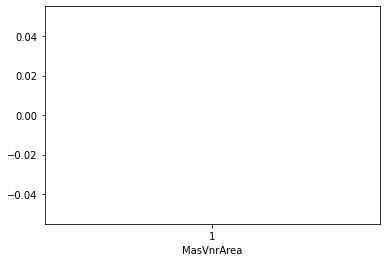

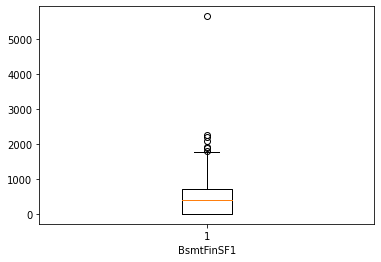

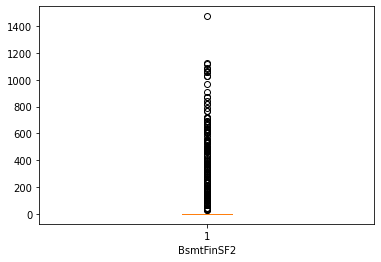

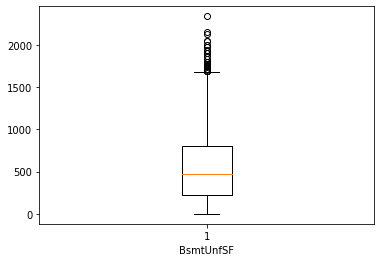

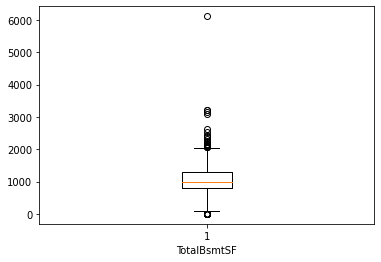

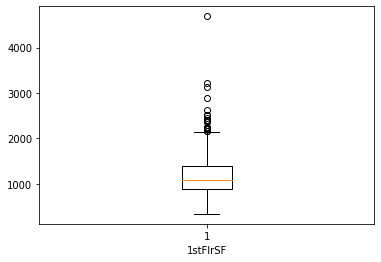

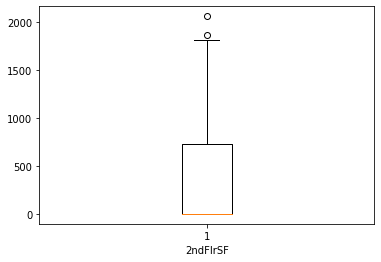

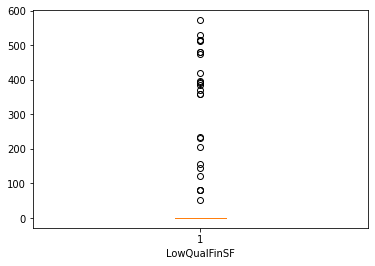

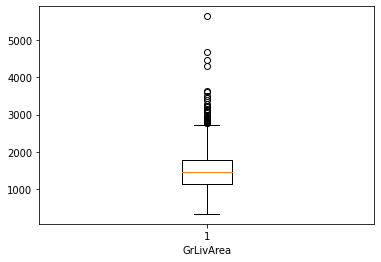

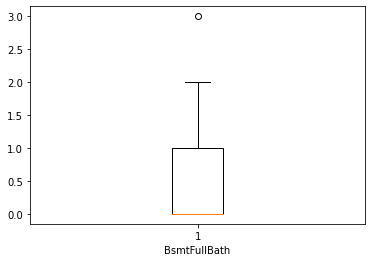

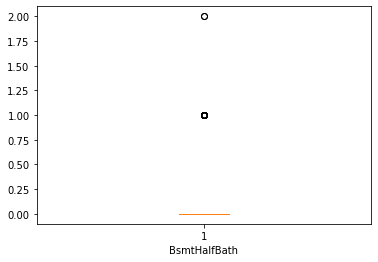

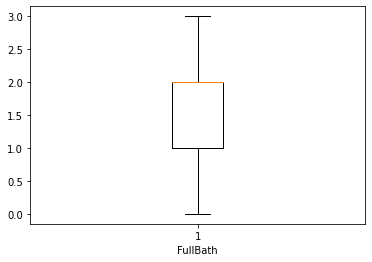

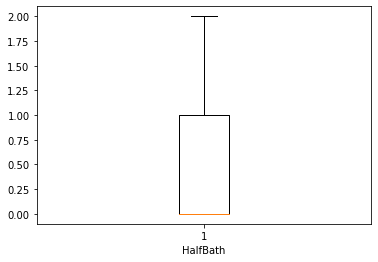

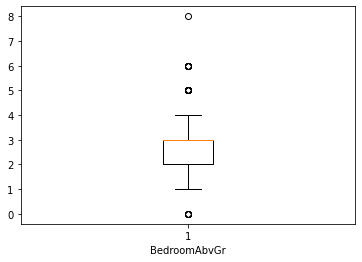

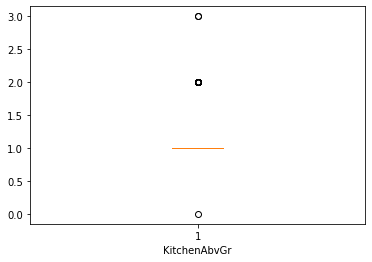

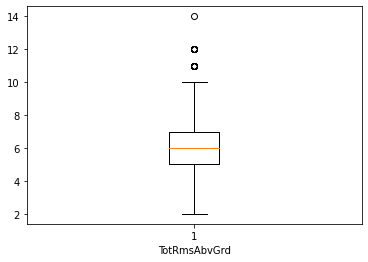

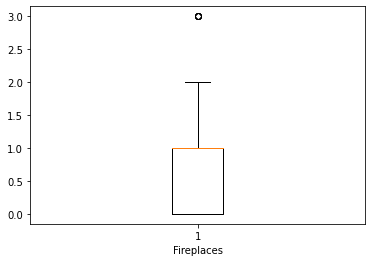

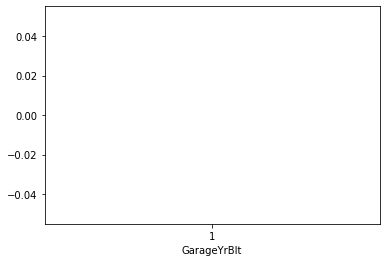

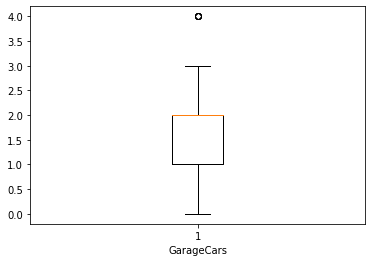

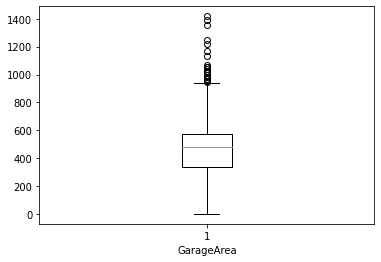

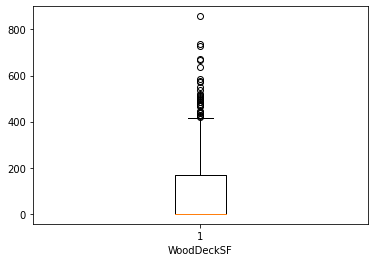

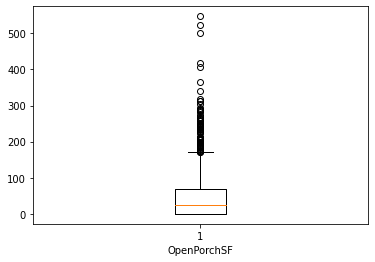

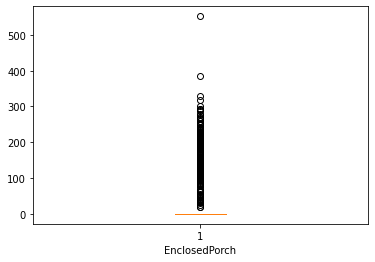

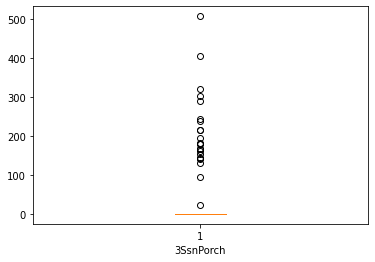

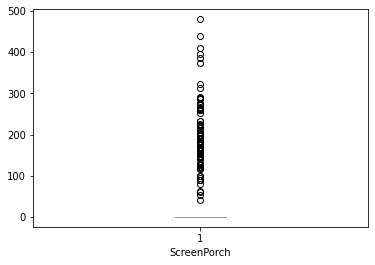

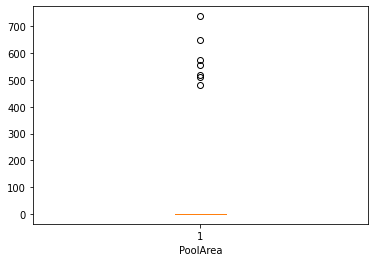

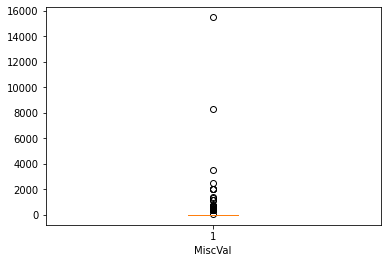

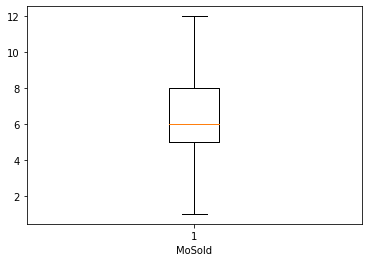

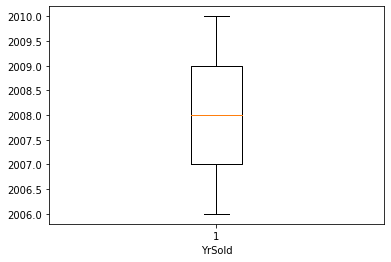

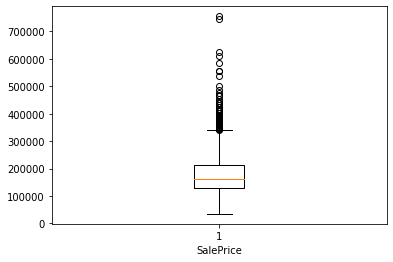

In [16]:
for col in numerical_features:
  plt.boxplot(df[col])
  plt.xlabel(col)
  plt.show()

There are outliers in few fields we can check the percentiles and its repective max values


In [17]:
df[numerical_features].describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,96.000000,14381.700000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,107.000000,17401.150000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,141.000000,37567.640000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [18]:
#adding columsn like age of property and years after remodelled
df['age_prop'] = df['YrSold'] - df['YearBuilt']
df['age_prop'] = df['YrSold'] - df['YearRemodAdd']
df[['age_prop','age_prop']]

,age_prop,age_prop
0,5,5
1,31,31
2,6,6
3,36,36
4,8,8
...,...,...
1455,7,7
1456,22,22
1457,4,4
1458,14,14


## Dopping the columns for either skewing the data or absence of enough informations

In [19]:
drop_cols = ['Id','Street','Utilities','Condition2','RoofMatl','BsmtFinType2','Heating','Functional','GarageCond','PoolQC',
'Fence','MiscFeature']
df.drop(drop_cols, axis=1, inplace=True)

In [20]:
categorical_features = list(df.select_dtypes(include='object').columns)
categorical_features

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

## Creating dummies and dropping the columns used in creating dummies

In [21]:
df.dropna(inplace=True)
housing_df = pd.concat([df,pd.get_dummies(df[categorical_features],drop_first=True)],axis=1).drop(categorical_features,axis=1)

## Scaling and Splitting the data data before creating the models

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
numerical_features.remove('SalePrice')

In [24]:


def feature_plot(df, feature):

  ## Creating a customized chart. and giving in figsize and everything. 
  fig = plt.figure(constrained_layout=True, figsize=(12,8))
  ## creating a grid of 3 cols and 3 rows. 
  grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
  #gs = fig3.add_gridspec(3, 3)

  ## Customizing the histogram grid. 
  ax1 = fig.add_subplot(grid[0, :2])
  ## Set the title. 
  ax1.set_title('Histogram')
  ## plot the histogram. 
  sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

  # customizing the QQ_plot. 
  ax2 = fig.add_subplot(grid[1, :2])
  ## Set the title. 
  ax2.set_title('QQ_plot')
  ## Plotting the QQ_Plot. 
  stats.probplot(df.loc[:,feature], plot = ax2)

  ## Customizing the Box Plot. 
  ax3 = fig.add_subplot(grid[:, 2])
  ## Set title. 
  ax3.set_title('Box Plot')
  ## Plotting the box plot. 
  sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );

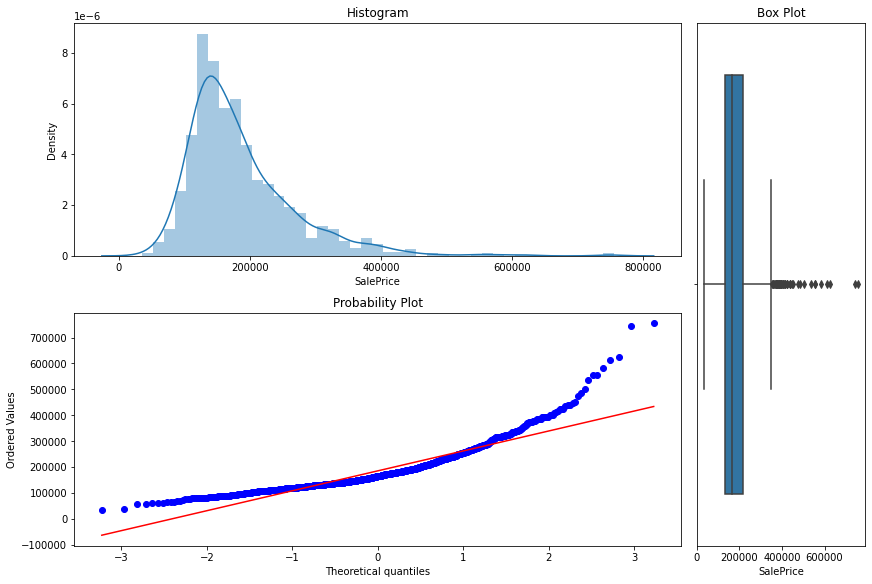

In [25]:
feature_plot(housing_df,'SalePrice')

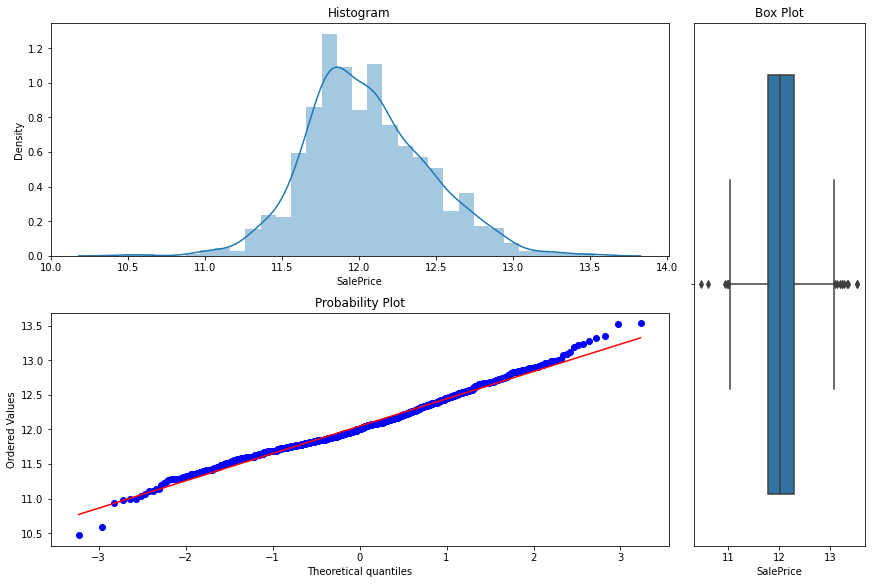

In [26]:
## Applying Log transformation to the price so that it sets as linear increase because data is skewed towards left
housing_df['SalePrice'] =  np.log1p(housing_df['SalePrice'])
feature_plot(housing_df,'SalePrice')

In [27]:

X = housing_df.drop('SalePrice',axis=1)
y = housing_df['SalePrice']

In [28]:
# Checking VIF score
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif_(X, thresh=5.0,print_verbose=False):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
          if print_verbose:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc)+ ' value: '+str(max(vif)))
          del variables[maxloc]
          dropped = True
    if print_verbose:
      print('Remaining variables:')
      print(X.columns[variables])
    return X.iloc[:, variables]

In [29]:
# X = calculate_vif_(X,5.0,True)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.70,random_state=42)

In [31]:
numerical_features_updated = list(set(numerical_features).intersection(set(X.columns)))

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scalar = StandardScaler()
X_train[numerical_features_updated] = scalar.fit_transform(X_train[numerical_features_updated])
X_test[numerical_features_updated] = scalar.transform(X_test[numerical_features_updated])

In [34]:
X_train.shape

(784, 206)

In [35]:
#Capture final value of alpha for Ridge and Lasso
alpha={}

## Ridge Regression

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [37]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,0.1,1,5,10,20,30,40,45,50,55,100,1000]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 40, 45, 50, 55, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [38]:
print(ridge_regressor.best_score_)
print(ridge_regressor.best_params_)
alpha['ridge'] = ridge_regressor.best_params_['alpha']

-0.026896769763418864
{'alpha': 10}


In [39]:
print(ridge_regressor.score(X_train,y_train))
print(ridge_regressor.score(X_test,y_test))

-0.013928166127917979
-0.016091256411007667


## Lasso Regression

In [40]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [41]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,0.1,1,5,10,20,30,40,45,50,55,100,1000]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 40, 45, 50, 55, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [42]:
print(lasso_regressor.best_score_)
print(lasso_regressor.best_params_)
alpha['lasso'] = lasso_regressor.best_params_['alpha']

-0.027924357168215876
{'alpha': 0.001}


In [43]:
print(lasso_regressor.score(X_train,y_train))
print(lasso_regressor.score(X_test,y_test))

-0.015833986380396653
-0.01614135498877361


## Elastic Net Regression

In [44]:
from sklearn.linear_model import ElasticNet

In [45]:
elastic_net = ElasticNet()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,0.1,1,5,10,20,30,40,45,50,55,100,1000],
              'l1_ratio':list(np.arange(0.0,1.1,0.1))}
elastic_regressor = GridSearchCV(elastic_net,parameters,scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 40, 45, 50, 55, 100, 1000],
                         'l1_ratio': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4,
                                      0.5, 0.6000000000000001,
                                      0.7000000000000001, 0.8, 0.9, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [46]:
print(elastic_regressor.best_score_)
print(elastic_regressor.best_params_)
alpha['elastic'] = elastic_regressor.best_params_['alpha']

-0.026892210765196406
{'alpha': 0.01, 'l1_ratio': 0.0}


In [47]:
print(elastic_regressor.score(X_train,y_train))
print(elastic_regressor.score(X_test,y_test))

-0.013606341933154598
-0.016187456910458895


## Combining all the co-effecients in a dataframe from linear ridge lasso and elastic net

In [48]:
coeff_df = pd.DataFrame()
coeff_df['parameters'] = X_train.columns
coeff_df['ridge'] = ridge_regressor.best_estimator_.coef_
coeff_df['lasso'] = lasso_regressor.best_estimator_.coef_
coeff_df['elastic'] = elastic_regressor.best_estimator_.coef_
coeff_df.shape


(206, 4)

In [49]:
coeff_df

,parameters,ridge,lasso,elastic
0,MSSubClass,-0.000499,-0.000589,-0.000489
1,LotFrontage,-0.006099,-0.001071,-0.006476
2,LotArea,0.020940,0.018217,0.021468
3,OverallQual,0.066775,0.071730,0.065620
4,OverallCond,0.045470,0.045944,0.045148
...,...,...,...,...
201,SaleCondition_AdjLand,0.000000,0.000000,0.000000
202,SaleCondition_Alloca,-0.004036,-0.000000,-0.004107
203,SaleCondition_Family,-0.022914,-0.000000,-0.024101
204,SaleCondition_Normal,0.055515,0.041650,0.058398


In [50]:
coeff_df[coeff_df['lasso'] == 0]

,parameters,ridge,lasso,elastic
6,YearRemodAdd,-0.000477,-0.0,-0.000481
8,BsmtFinSF1,-0.008348,-0.0,-0.009311
11,TotalBsmtSF,-0.006036,0.0,-0.007383
12,1stFlrSF,0.032800,0.0,0.033474
13,2ndFlrSF,0.037296,0.0,0.038591
...,...,...,...,...
199,SaleType_Oth,0.014610,0.0,0.018348
201,SaleCondition_AdjLand,0.000000,0.0,0.000000
202,SaleCondition_Alloca,-0.004036,-0.0,-0.004107
203,SaleCondition_Family,-0.022914,-0.0,-0.024101


In [51]:
coeff_df[~(coeff_df['lasso'] == 0)]

,parameters,ridge,lasso,elastic
0,MSSubClass,-0.000499,-0.000589,-0.000489
1,LotFrontage,-0.006099,-0.001071,-0.006476
2,LotArea,0.020940,0.018217,0.021468
3,OverallQual,0.066775,0.071730,0.065620
4,OverallCond,0.045470,0.045944,0.045148
...,...,...,...,...
186,GarageFinish_Unf,-0.010970,-0.007397,-0.010739
187,GarageQual_Fa,-0.023557,-0.000766,-0.026079
198,SaleType_New,0.033514,0.045037,0.036421
200,SaleType_WD,-0.018168,-0.012830,-0.017831


In [52]:
columns = coeff_df.columns[1:]
for col in columns:
  coeff_df['squared'+col] = coeff_df[col]**2

coeff_df

,parameters,ridge,lasso,elastic,squaredridge,squaredlasso,squaredelastic
0,MSSubClass,-0.000499,-0.000589,-0.000489,2.489932e-07,3.472469e-07,2.390089e-07
1,LotFrontage,-0.006099,-0.001071,-0.006476,3.719383e-05,1.146605e-06,4.193829e-05
2,LotArea,0.020940,0.018217,0.021468,4.384632e-04,3.318425e-04,4.608909e-04
3,OverallQual,0.066775,0.071730,0.065620,4.458937e-03,5.145132e-03,4.305941e-03
4,OverallCond,0.045470,0.045944,0.045148,2.067480e-03,2.110842e-03,2.038315e-03
...,...,...,...,...,...,...,...
201,SaleCondition_AdjLand,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
202,SaleCondition_Alloca,-0.004036,-0.000000,-0.004107,1.629187e-05,0.000000e+00,1.686611e-05
203,SaleCondition_Family,-0.022914,-0.000000,-0.024101,5.250603e-04,0.000000e+00,5.808579e-04
204,SaleCondition_Normal,0.055515,0.041650,0.058398,3.081935e-03,1.734723e-03,3.410370e-03


In [53]:
sorted_ridge_df = coeff_df.sort_values(ascending=False,by=['squaredridge'])
sorted_lasso_df = coeff_df.sort_values(ascending=False,by=['squaredlasso'])
sorted_elastic_df = coeff_df.sort_values(ascending=False,by=['squaredelastic'])

In [54]:
sorted_ridge_df.head(10)

,parameters,ridge,lasso,elastic,squaredridge,squaredlasso,squaredelastic
70,Neighborhood_NridgHt,0.098734,0.121187,0.107585,0.009748,0.014686,0.011575
60,Neighborhood_Crawfor,0.096314,0.115980,0.102267,0.009276,0.013451,0.010458
61,Neighborhood_Edwards,-0.087240,-0.077942,-0.090931,0.007611,0.006075,0.008269
103,Exterior1st_BrkFace,0.074573,0.076257,0.081067,0.005561,0.005815,0.006572
76,Neighborhood_StoneBr,0.069412,0.071844,0.080340,0.004818,0.005161,0.006454
3,OverallQual,0.066775,0.071730,0.065620,0.004459,0.005145,0.004306
166,CentralAir_Y,0.065368,0.071198,0.069021,0.004273,0.005069,0.004764
39,MSZoning_RL,0.064022,0.057752,0.070940,0.004099,0.003335,0.005033
161,BsmtFinType1_Unf,-0.059134,-0.054478,-0.061927,0.003497,0.002968,0.003835
44,LotShape_IR3,-0.057210,-0.033021,-0.065026,0.003273,0.001090,0.004228


In [55]:
sorted_lasso_df.head(10)

,parameters,ridge,lasso,elastic,squaredridge,squaredlasso,squaredelastic
70,Neighborhood_NridgHt,0.098734,0.121187,0.107585,0.009748,0.014686,0.011575
60,Neighborhood_Crawfor,0.096314,0.115980,0.102267,0.009276,0.013451,0.010458
15,GrLivArea,0.055551,0.094502,0.057141,0.003086,0.008931,0.003265
61,Neighborhood_Edwards,-0.087240,-0.077942,-0.090931,0.007611,0.006075,0.008269
103,Exterior1st_BrkFace,0.074573,0.076257,0.081067,0.005561,0.005815,0.006572
76,Neighborhood_StoneBr,0.069412,0.071844,0.080340,0.004818,0.005161,0.006454
3,OverallQual,0.066775,0.071730,0.065620,0.004459,0.005145,0.004306
166,CentralAir_Y,0.065368,0.071198,0.069021,0.004273,0.005069,0.004764
75,Neighborhood_Somerst,0.042920,0.068984,0.046374,0.001842,0.004759,0.002151
69,Neighborhood_NoRidge,0.057015,0.058740,0.063177,0.003251,0.003450,0.003991


In [56]:
alpha

{'elastic': 0.01, 'lasso': 0.001, 'ridge': 10}

Checking the predictions on the test set for ridge lasso and elastic

In [57]:
y_pred = pd.DataFrame(y_test)
models = ['ridge','lasso','elastic']

In [58]:
y_pred['ridge'] = ridge_regressor.best_estimator_.predict(X_test)
y_pred['lasso'] = lasso_regressor.best_estimator_.predict(X_test)
y_pred['elastic'] = elastic_regressor.best_estimator_.predict(X_test)

In [59]:
for model in models:
  y_pred[model+'_residual'] = y_pred['SalePrice'] - y_pred[model]
y_pred.columns

Index(['SalePrice', 'ridge', 'lasso', 'elastic', 'ridge_residual',
       'lasso_residual', 'elastic_residual'],
      dtype='object')

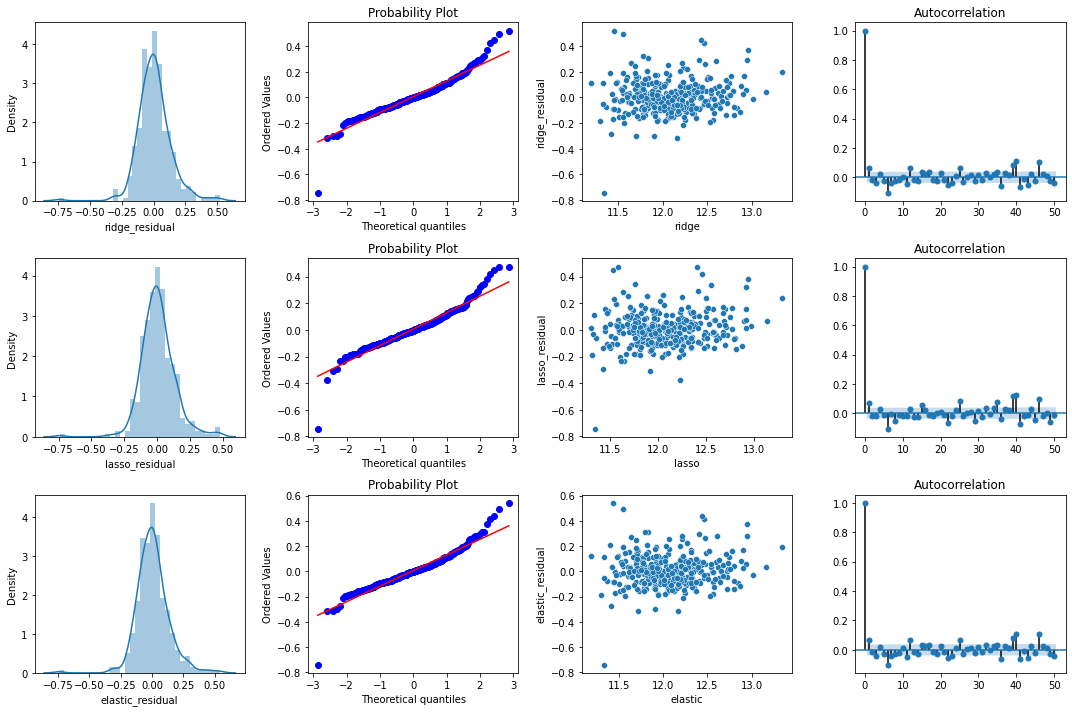

In [60]:
fig, ax = plt.subplots(3,4,figsize=(15,10))
# fig.suptitle('Verifying assumptions of Linear Regression')
for index,model in enumerate(models):
  sns.distplot(ax=ax[index][0],a=y_pred[model+'_residual'])
  stats.probplot(y_pred[model+'_residual'],plot=ax[index][1])
  sns.scatterplot(y_pred[model],y_pred[model+'_residual'],ax=ax[index][2])
  sm.graphics.tsa.plot_acf(y_pred[model+'_residual'],ax=ax[index][3],lags=50,alpha=0.5)
fig.tight_layout()
plt.show()

In [61]:
alpha

{'elastic': 0.01, 'lasso': 0.001, 'ridge': 10}

In [63]:
# doubling the alpha values for the model
from sklearn.model_selection import cross_val_score
ridge_new = Ridge(alpha=alpha['ridge'])
np.mean(cross_val_score(ridge_new,X_train,y_train,scoring='neg_mean_squared_error',cv=5))
coeff_df['double_ridge'] = ridge_new.fit(X_train,y_train).coef_


In [64]:
lasso_new = Lasso(alpha=alpha['lasso'])
np.mean(cross_val_score(lasso_new,X_train,y_train,scoring='neg_mean_squared_error',cv=5))
coeff_df['double_lasso'] = lasso_new.fit(X_train,y_train).coef_

In [65]:
coeff_df['double_ridge_squared'] = coeff_df['double_ridge']**2
coeff_df['double_lasso_squared'] = coeff_df['double_lasso']**2

In [66]:
print(coeff_df.sort_values(by='double_lasso_squared',ascending=False).head(10)[['parameters','double_ridge_squared']])
print(coeff_df.sort_values(by='squaredlasso',ascending=False).head(10)[['parameters','squaredridge']])

               parameters  double_ridge_squared
70   Neighborhood_NridgHt              0.009748
60   Neighborhood_Crawfor              0.009276
15              GrLivArea              0.003086
61   Neighborhood_Edwards              0.007611
103   Exterior1st_BrkFace              0.005561
76   Neighborhood_StoneBr              0.004818
3             OverallQual              0.004459
166          CentralAir_Y              0.004273
75   Neighborhood_Somerst              0.001842
69   Neighborhood_NoRidge              0.003251
               parameters  squaredridge
70   Neighborhood_NridgHt      0.009748
60   Neighborhood_Crawfor      0.009276
15              GrLivArea      0.003086
61   Neighborhood_Edwards      0.007611
103   Exterior1st_BrkFace      0.005561
76   Neighborhood_StoneBr      0.004818
3             OverallQual      0.004459
166          CentralAir_Y      0.004273
75   Neighborhood_Somerst      0.001842
69   Neighborhood_NoRidge      0.003251


In [67]:
print(coeff_df.sort_values(by='double_lasso_squared',ascending=False).head(10)[['parameters','double_lasso_squared']])
print(coeff_df.sort_values(by='squaredlasso',ascending=False).head(10)[['parameters','squaredlasso']])

               parameters  double_lasso_squared
70   Neighborhood_NridgHt              0.014686
60   Neighborhood_Crawfor              0.013451
15              GrLivArea              0.008931
61   Neighborhood_Edwards              0.006075
103   Exterior1st_BrkFace              0.005815
76   Neighborhood_StoneBr              0.005161
3             OverallQual              0.005145
166          CentralAir_Y              0.005069
75   Neighborhood_Somerst              0.004759
69   Neighborhood_NoRidge              0.003450
               parameters  squaredlasso
70   Neighborhood_NridgHt      0.014686
60   Neighborhood_Crawfor      0.013451
15              GrLivArea      0.008931
61   Neighborhood_Edwards      0.006075
103   Exterior1st_BrkFace      0.005815
76   Neighborhood_StoneBr      0.005161
3             OverallQual      0.005145
166          CentralAir_Y      0.005069
75   Neighborhood_Somerst      0.004759
69   Neighborhood_NoRidge      0.003450


In [68]:
print(*list(coeff_df.sort_values(by='squaredlasso',ascending=False).head(10)['parameters']),sep=' ')

Neighborhood_NridgHt Neighborhood_Crawfor GrLivArea Neighborhood_Edwards Exterior1st_BrkFace Neighborhood_StoneBr OverallQual CentralAir_Y Neighborhood_Somerst Neighborhood_NoRidge
